### Import the required pacakges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
file_path="C:\\Users\\jayan\\OneDrive\\DATA_SCIENCE\\analytics vidhya hackathon\\DataSets\\Loan Prediction\\train_ctrUa4K.csv"
df=pd.read_csv(file_path)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Data Preprocessing Part 1

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.shape

(614, 13)

In [5]:
df.drop(columns = ['Loan_ID'], inplace=True)

In [6]:
df=df.replace({"3+":"4"})
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.select_dtypes(include='object').nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

### Exploratory Data Analysis

In [8]:
cat_vars = df.select_dtypes(include='object').columns.tolist()
print(len(cat_vars))
print(cat_vars)

7
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [9]:
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
print(len(num_vars))
print(num_vars)

5
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


### Data Preprocessing Part 2

In [10]:
# Check the amounnt of missing value
check_missing = df.isnull().sum()* 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64

In [11]:
for column,dtype in df.dtypes.items():
    if dtype=='object':
        df[column].fillna(df[column].mode()[0],inplace=True)
    else:
        df[column].fillna(df[column].median(),inplace=True)

In [12]:
check_missing = df.isnull().sum()* 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [13]:
df.shape

(614, 12)

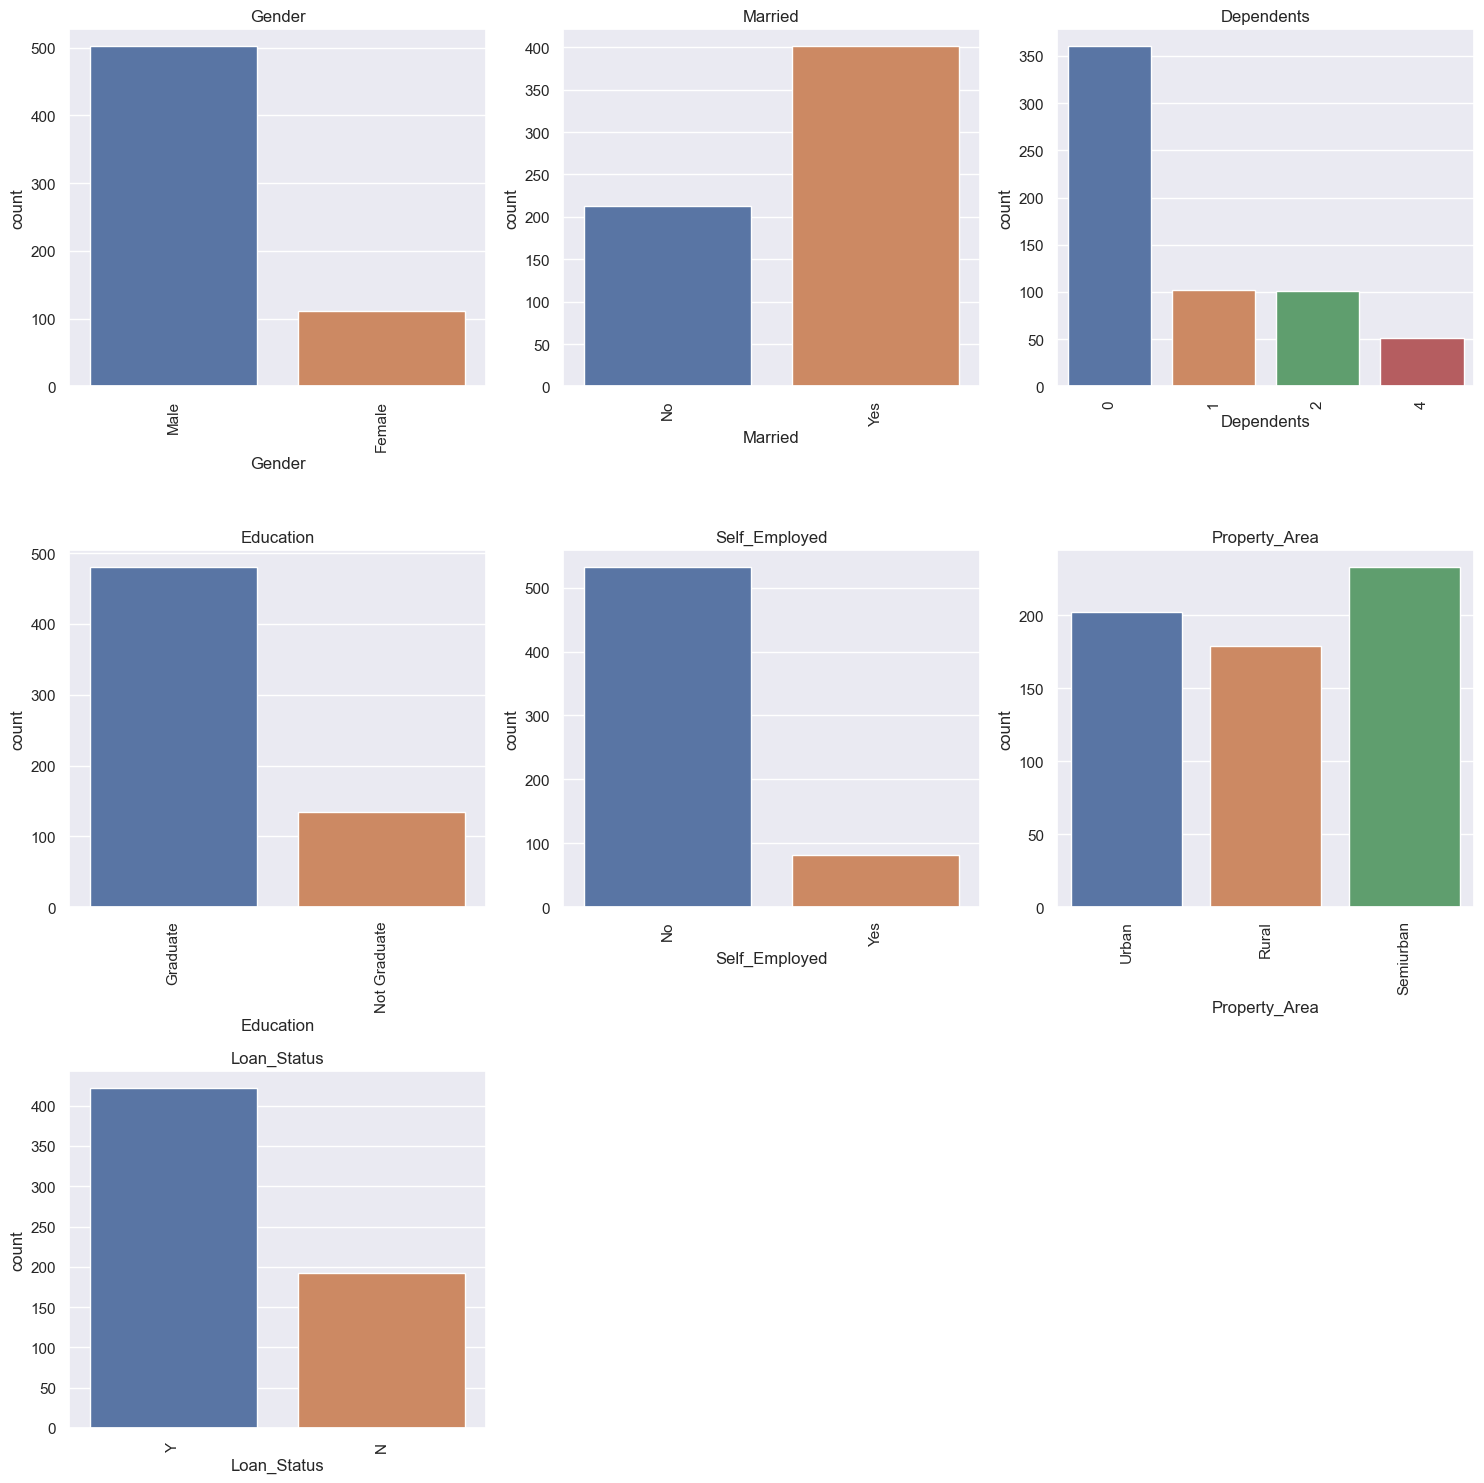

In [14]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
fig.tight_layout()
plt.show()

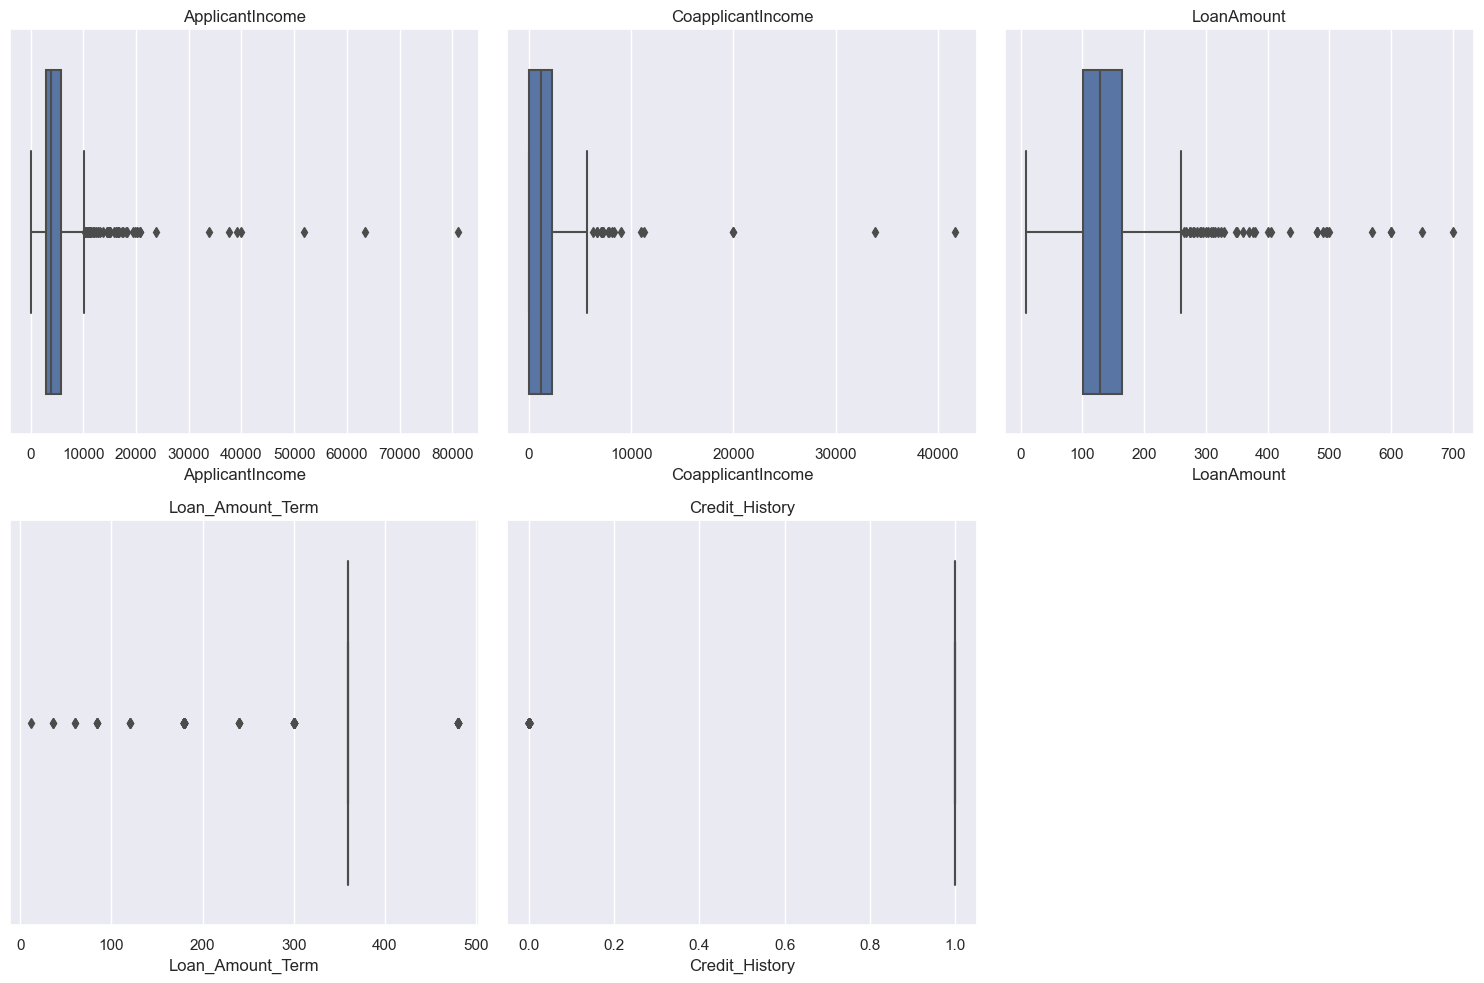

In [15]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
fig.tight_layout()
plt.show()

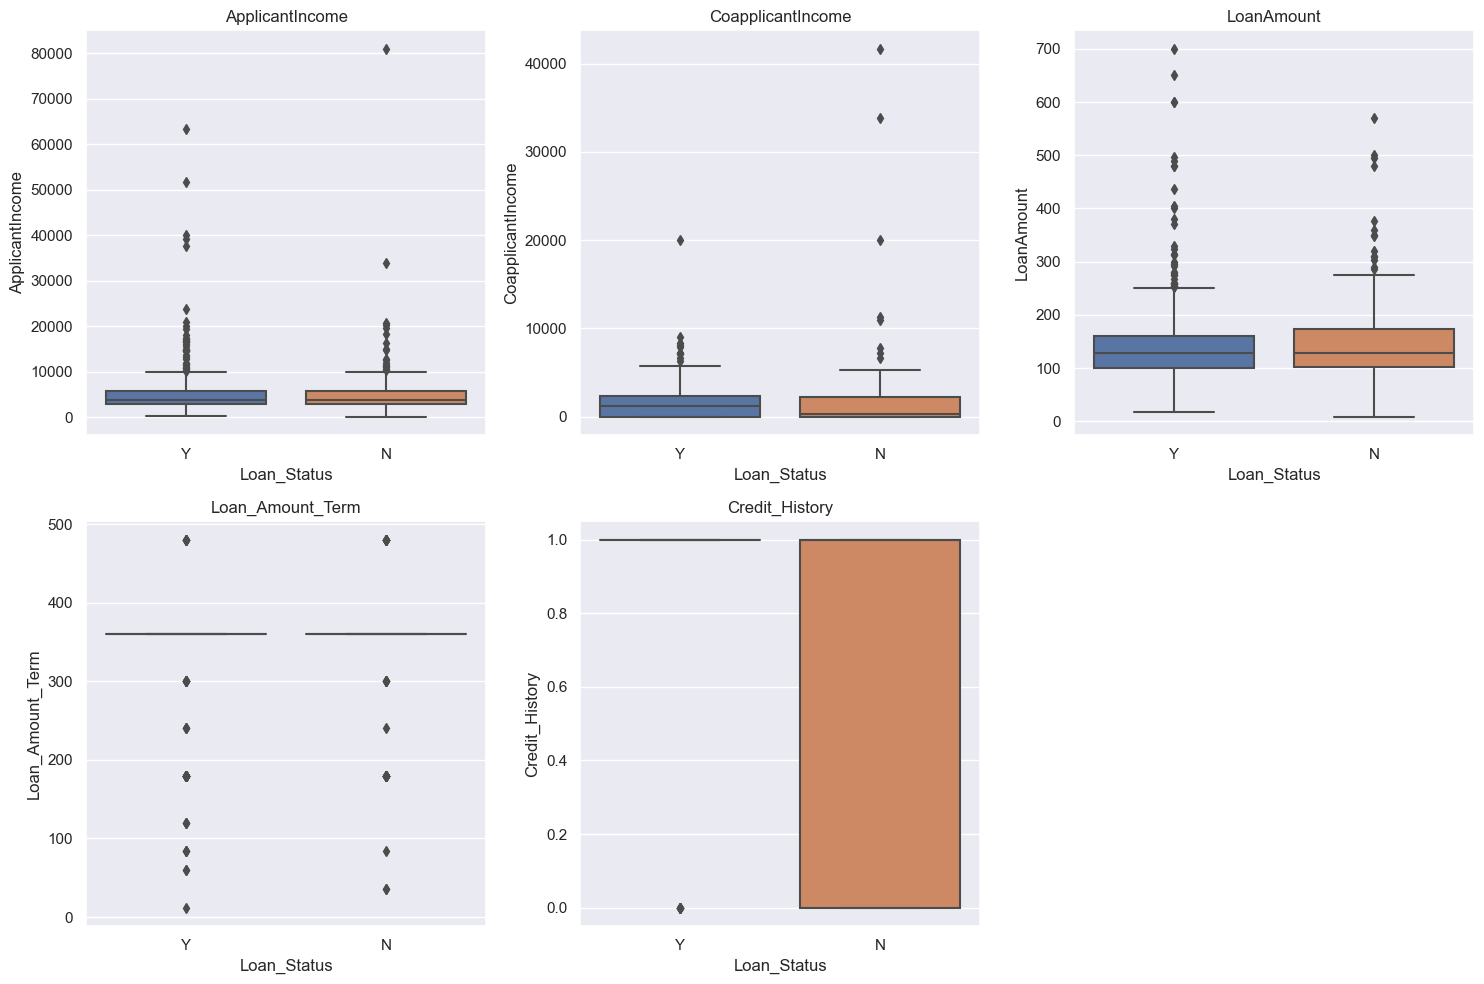

In [16]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Loan_Status', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

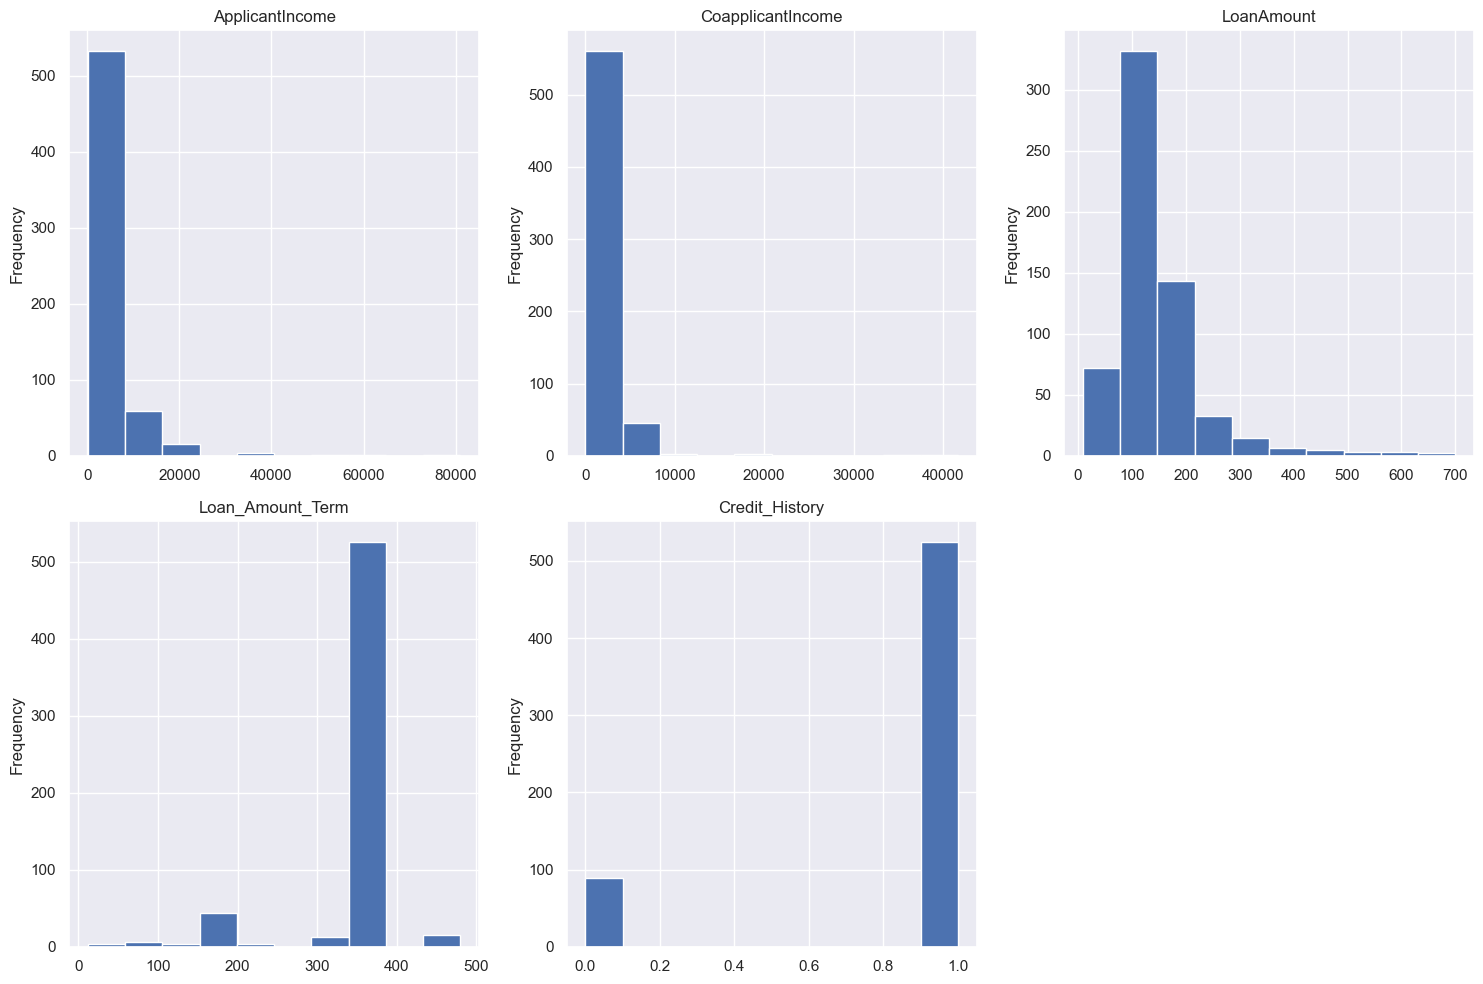

In [17]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

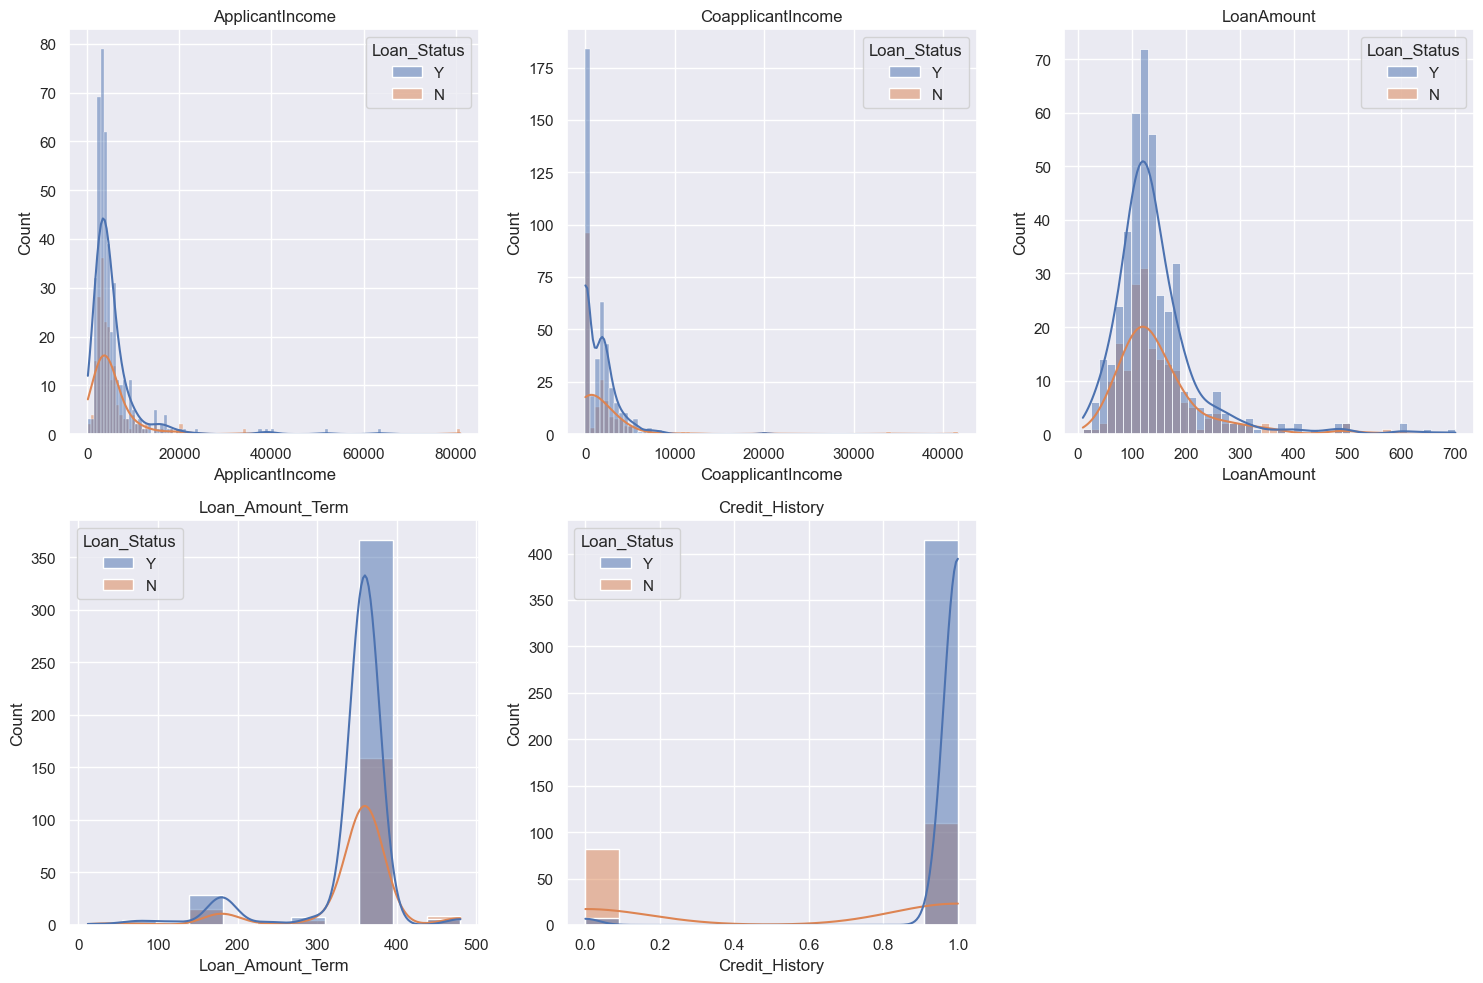

In [18]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, 
                 hue='Loan_Status', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

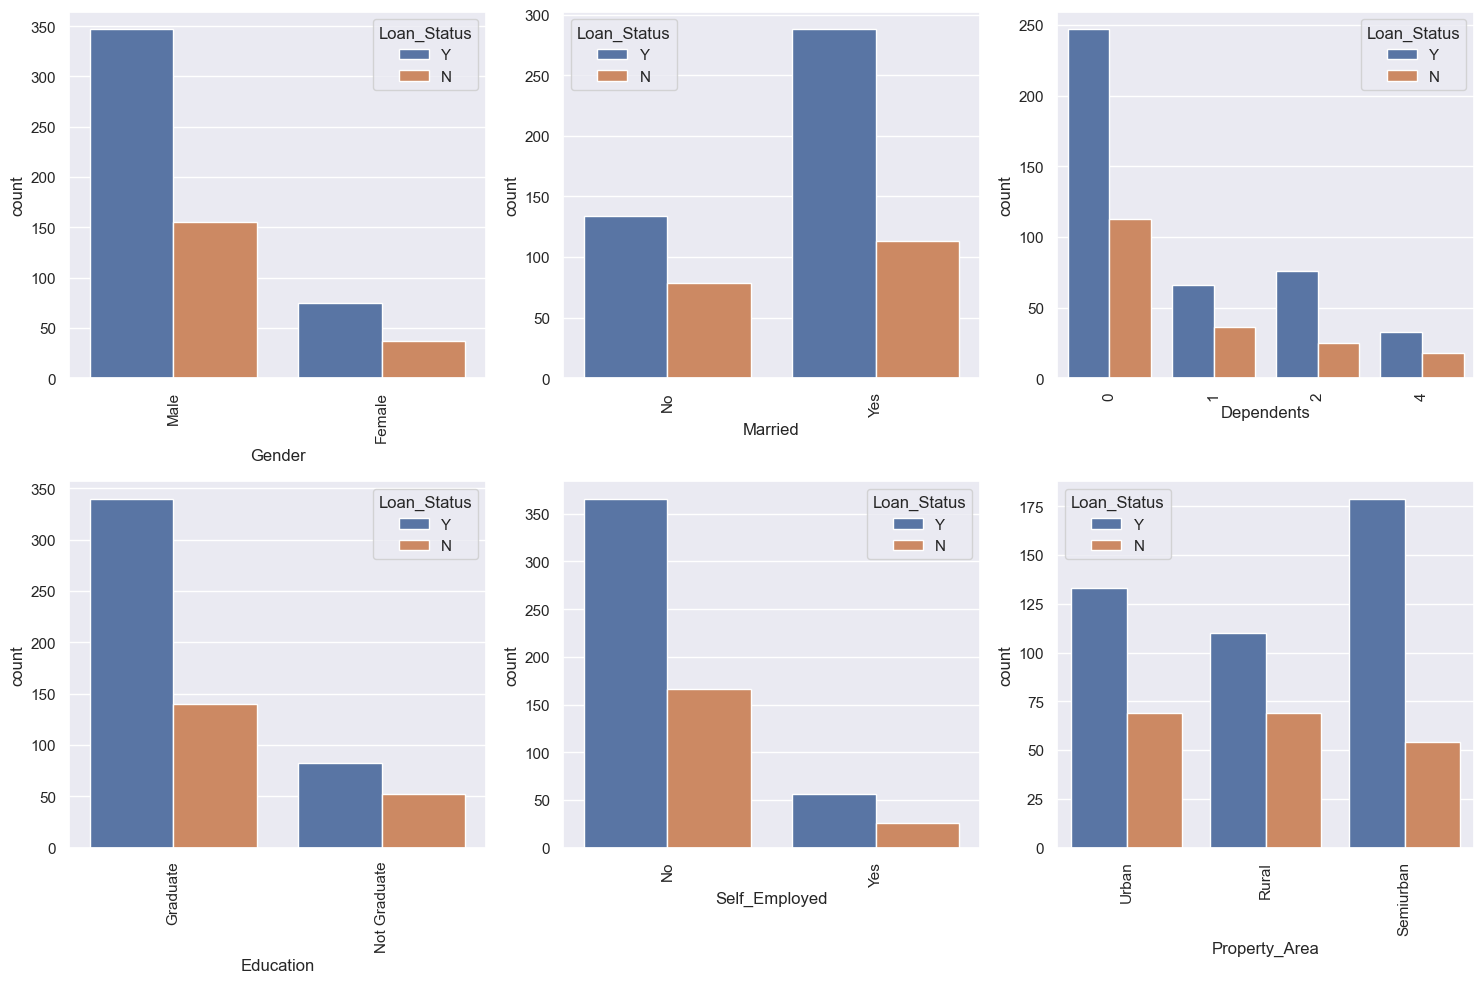

In [19]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Loan_Status' in cat_vars:
    cat_vars.remove('Loan_Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='Loan_Status', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])
    
fig.tight_layout()
plt.show()

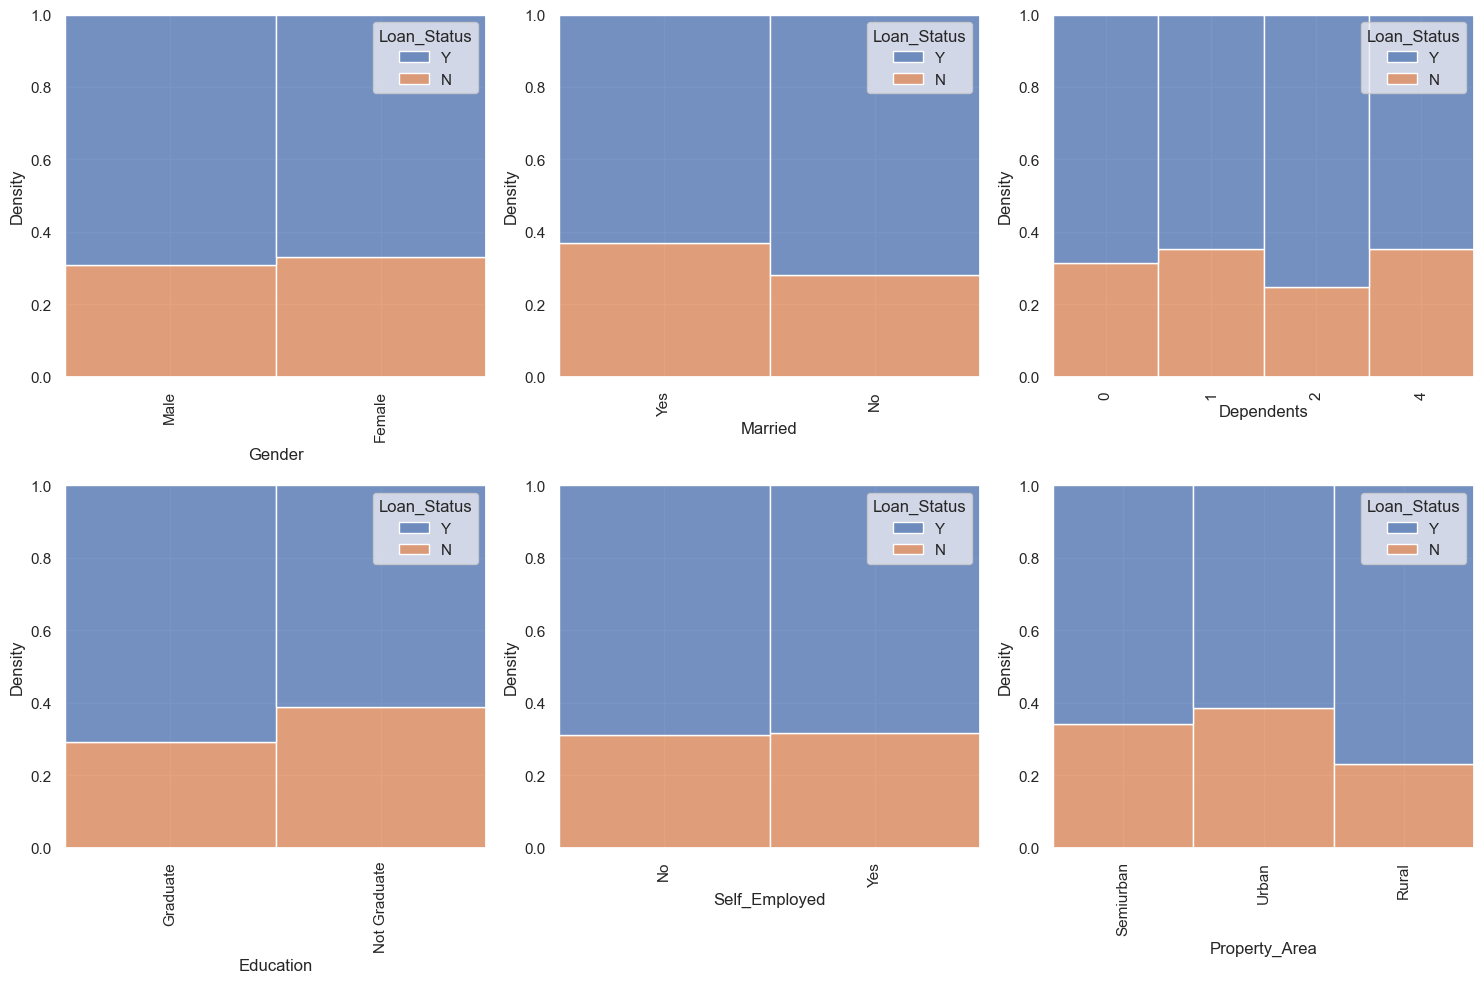

In [20]:
import warnings

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Loan_Status' in cat_vars:
    cat_vars.remove('Loan_Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable as a density plot
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]

    # Set x-tick positions explicitly
    tick_positions = range(len(top_values))
    axs[i].set_xticks(tick_positions)
    axs[i].set_xticklabels(top_values, rotation=90)  # Set x-tick labels

    sns.histplot(x=var, hue='Loan_Status', data=filtered_df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xlabel(var)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])
    
fig.tight_layout()
plt.show()

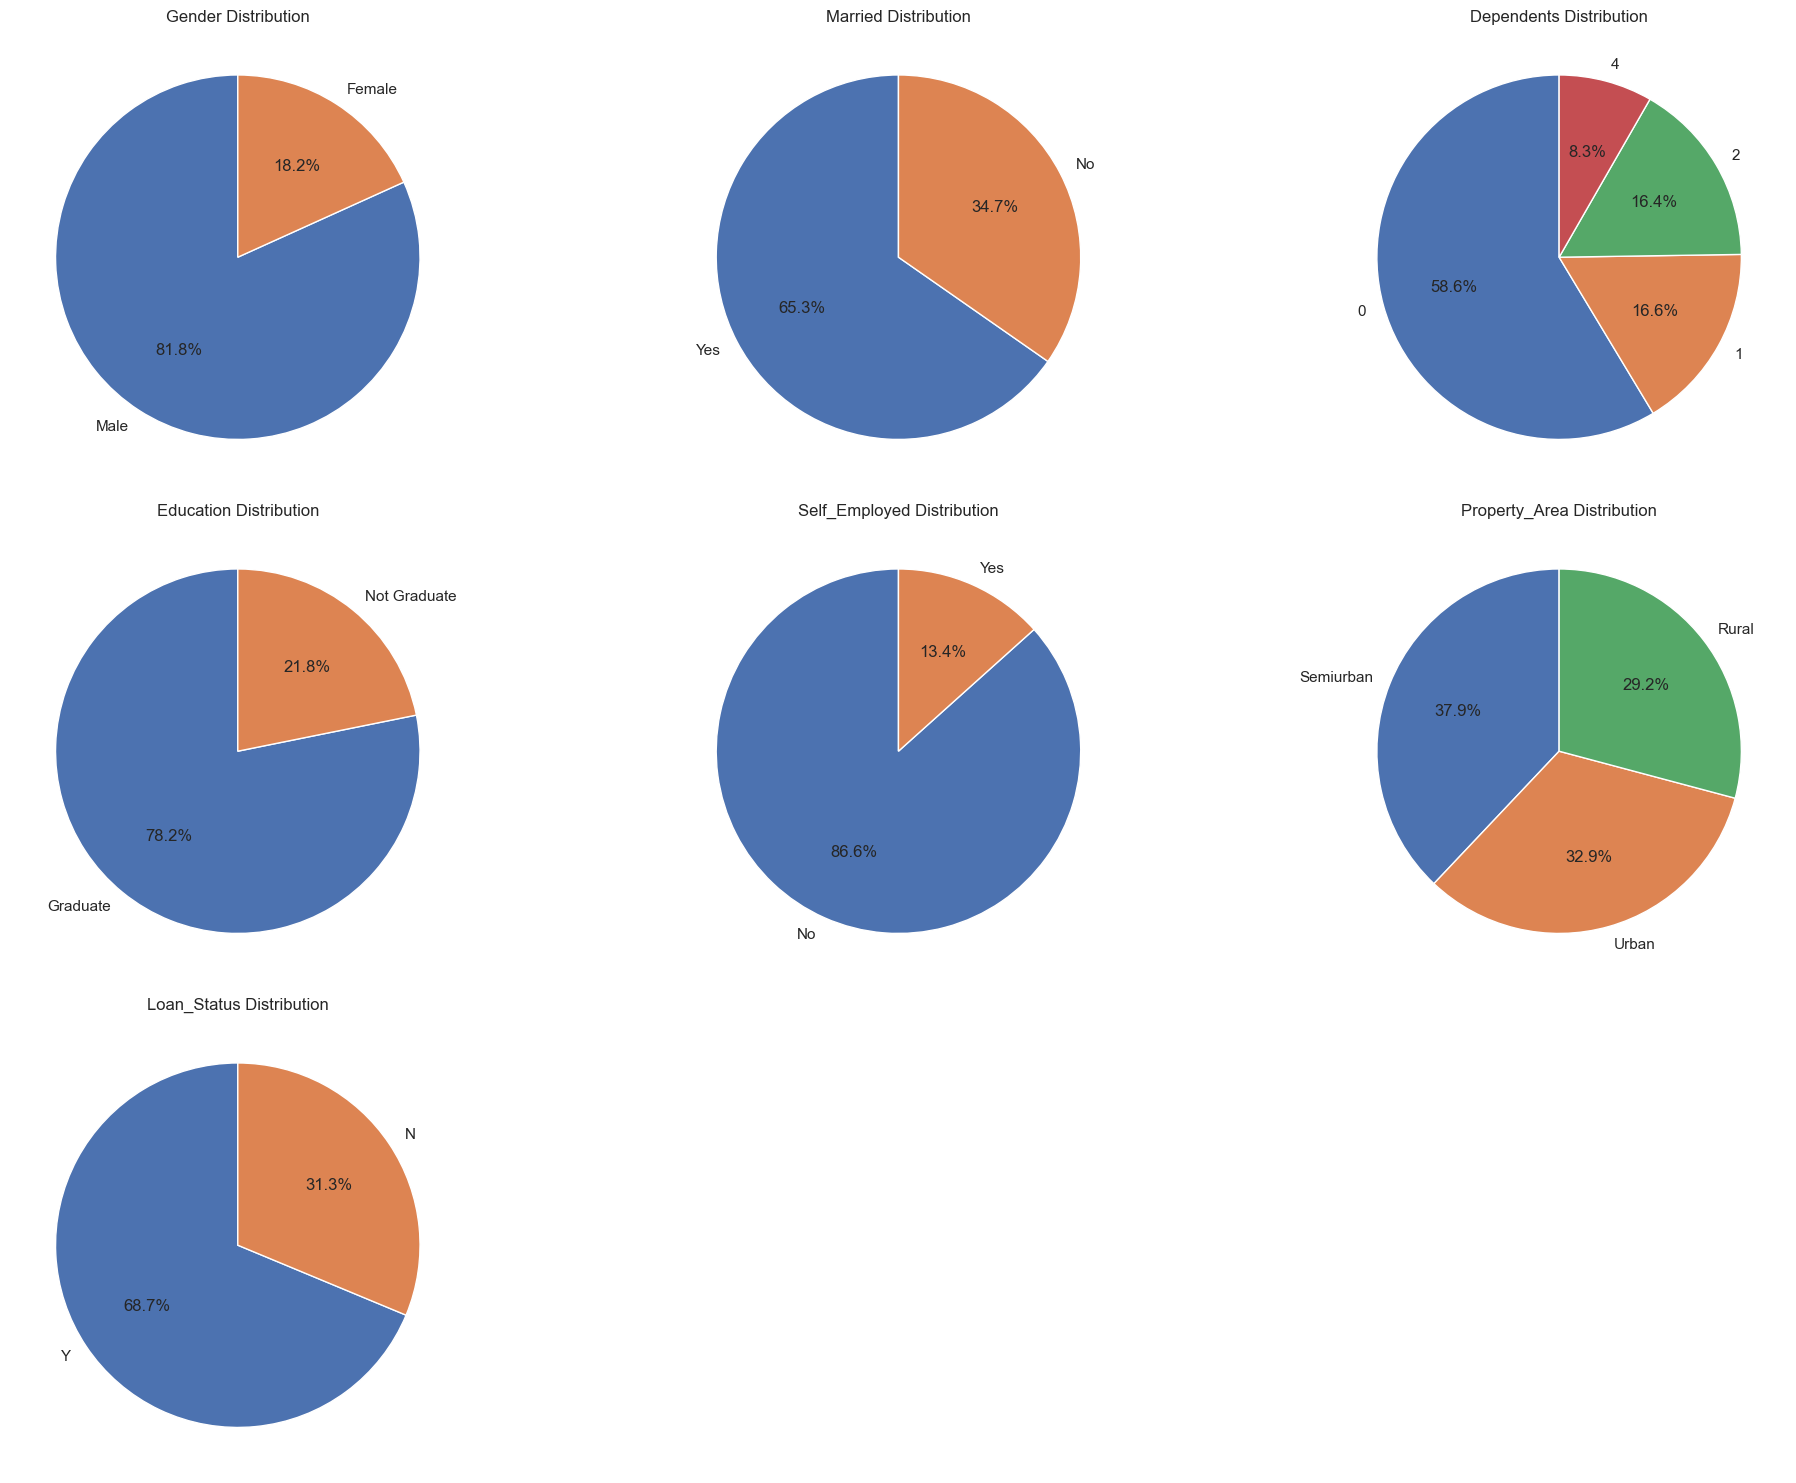

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df.columns if col != 'y' and df[col].dtype == 'object']

# Calculate the number of rows and columns dynamically
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3  # Adjust the divisor for the desired number of columns per row

# Create a figure with subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=min(3, num_cols), figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = pd.concat([cat_counts_top, cat_counts_other])

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()


In [22]:
# Multi classification or Bi classifiacion

df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

### Label Encoding for Object Datatypes

In [23]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '4']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [24]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Gender: [1 0]
Married: [0 1]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Property_Area: [2 0 1]
Loan_Status: [1 0]


In [25]:
corr=df.corr(numeric_only=True)
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


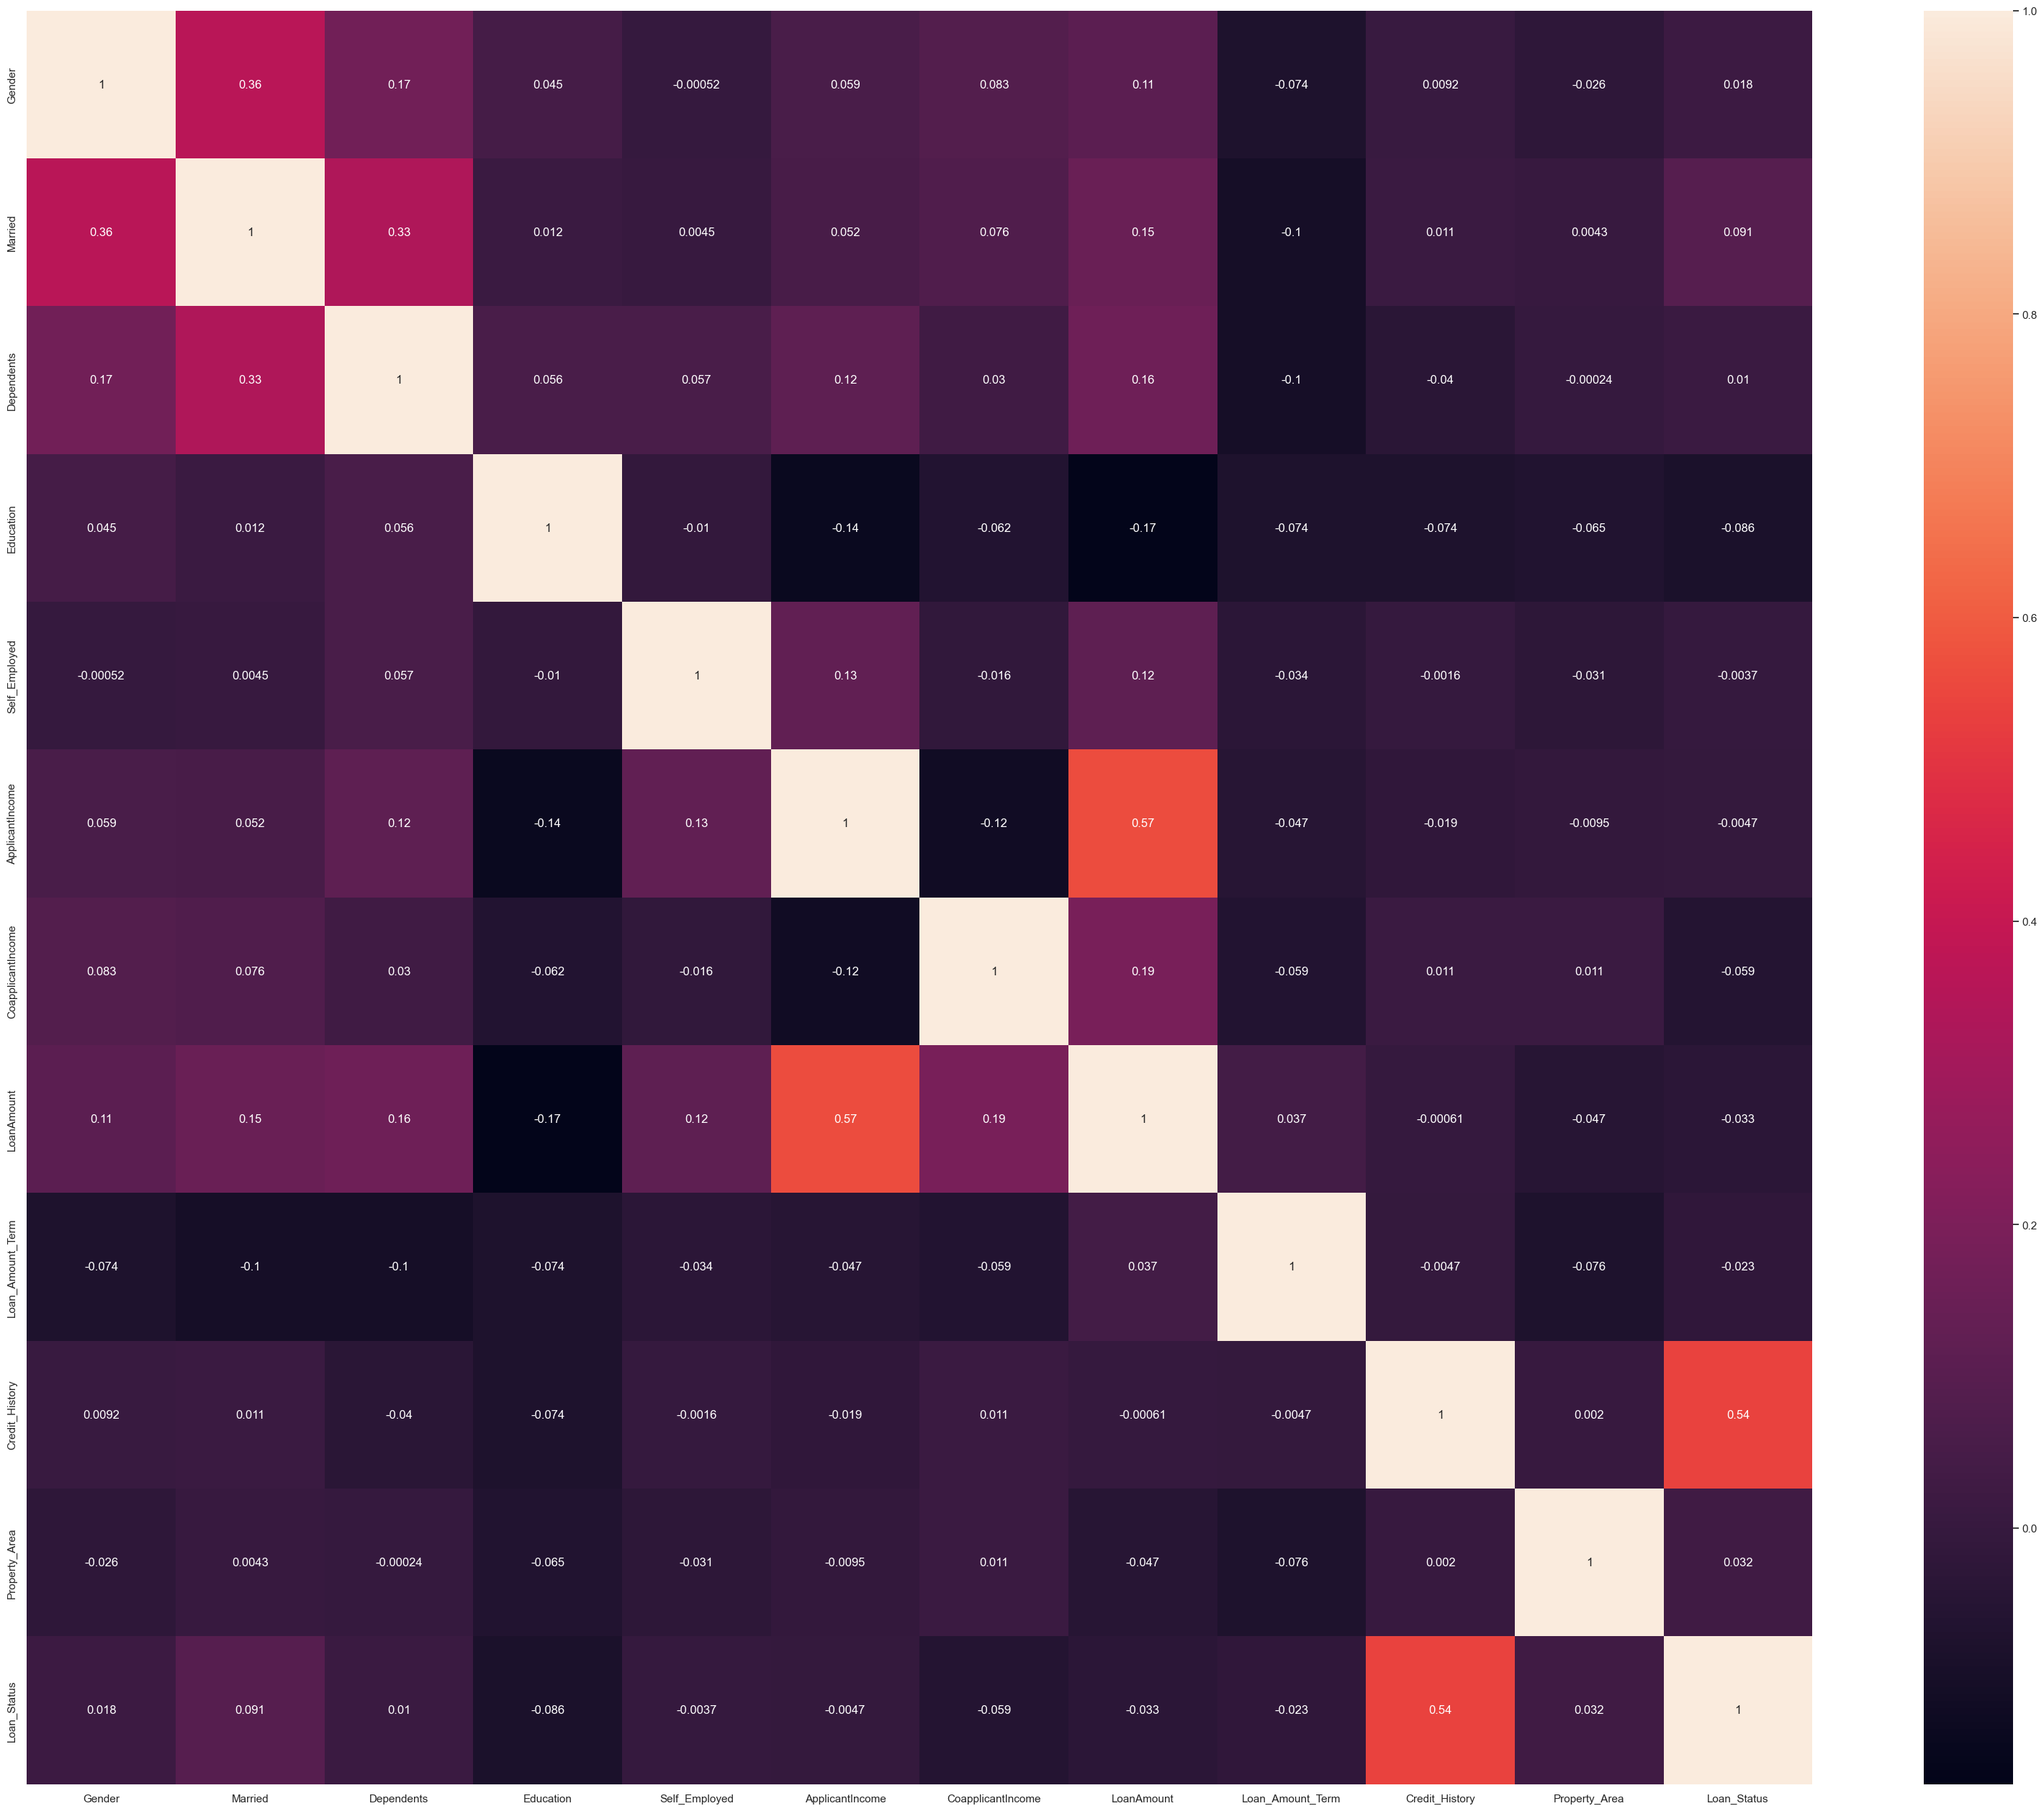

In [26]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)
plt.show()

In [27]:
# df.to_csv("Preprocessed_Loandata.csv")

### Divide data into two parts Input and Output

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [29]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [30]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [31]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [32]:
X.shape, y.shape

((614, 11), (614,))

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [34]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


### Remove Outlier from Train Data using Z-Score

In [35]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [36]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,1
533,1,0,1,0,0,11250,0.0,196.0,360.0,1.0,1
452,1,1,0,0,0,3948,1733.0,149.0,360.0,0.0,0
355,0,0,0,0,0,3813,0.0,116.0,180.0,1.0,2
266,1,1,2,0,0,4708,1387.0,150.0,360.0,1.0,1


In [37]:
y_train.head()

90     1
533    0
452    0
355    1
266    1
Name: Loan_Status, dtype: int32

### With out hyperparameter tuning

#### Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred_dt=dtree.predict(X_test)

In [41]:
print(y_pred_dt[:10])
print(y_test.values[:10])

[0 1 1 0 1 1 1 0 0 1]
[1 0 1 0 1 0 1 1 0 1]


In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [43]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)


In [44]:
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

accuray is: 71.54
F1 is: 0.8
Precision is: 0.84
Recall is: 0.76


In [45]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.48      0.61      0.53        33
           1       0.84      0.76      0.80        90

    accuracy                           0.72       123
   macro avg       0.66      0.68      0.66       123
weighted avg       0.74      0.72      0.73       123



In [46]:
from sklearn.metrics import confusion_matrix
cmt=confusion_matrix(y_test,y_pred_dt)
cmt

array([[20, 13],
       [22, 68]], dtype=int64)

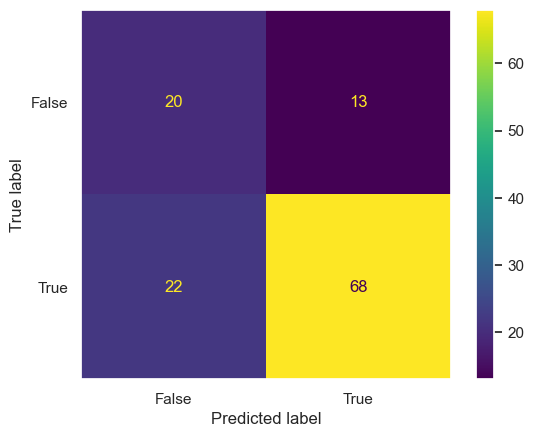

In [47]:
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True]).plot()

plt.grid(False)
plt.show()


In [48]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 20
False postive: 13
False negative: 22
True postive: 68


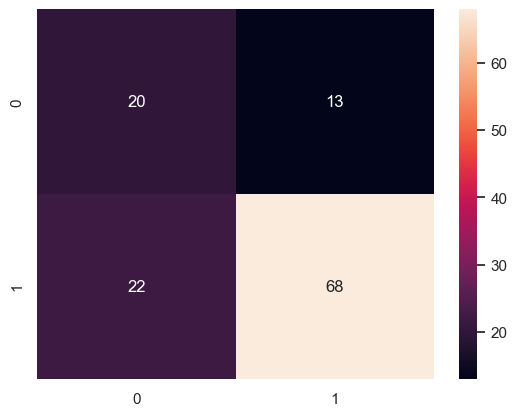

In [49]:
sns.heatmap(cmt,annot=True)
plt.show()

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

In [51]:
probs=dtree.predict_proba(X_test)
dtree.predict_proba(X_test)[:,1]

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1.])

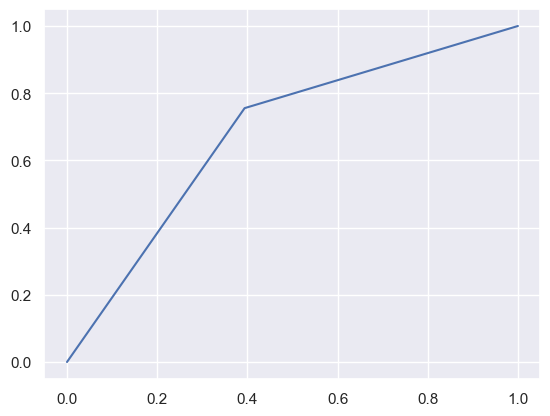

In [52]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

#### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred_log=logtree.predict(X_test)

In [56]:
print(y_pred_log[:10])
print(y_test.values[:10])

[1 1 1 1 1 0 1 1 0 1]
[1 0 1 0 1 0 1 1 0 1]


In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [58]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)

In [59]:
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 82.93
F1 is: 0.89
Precision is: 0.82
Recall is: 0.98


In [60]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [61]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [62]:
confusion_matrix(y_test,y_pred_log)

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [63]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 14
False postive: 19
False negative: 2
True postive: 88


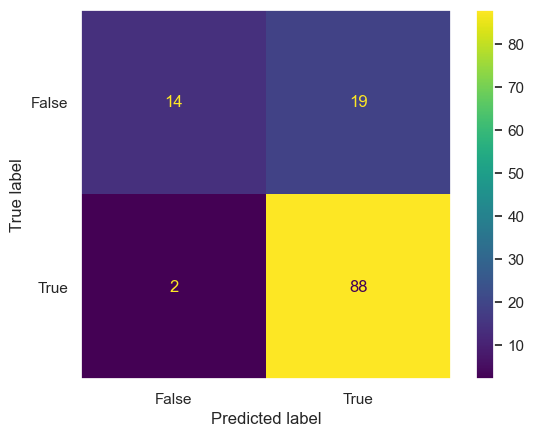

In [64]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True]).plot()

plt.grid(False)
plt.show()

In [65]:
logtree.predict_proba(X_test)[:,1]

array([0.76621488, 0.77410996, 0.71798127, 0.8487608 , 0.83826254,
       0.15192101, 0.90715283, 0.53020404, 0.09486932, 0.81199242,
       0.78871739, 0.80858305, 0.65321579, 0.77027319, 0.85531289,
       0.86558428, 0.56093682, 0.63313389, 0.78715982, 0.08907448,
       0.19512815, 0.79925356, 0.80221337, 0.80210131, 0.82674986,
       0.74386855, 0.72729714, 0.79992269, 0.16715714, 0.1289042 ,
       0.75084319, 0.6756103 , 0.75917803, 0.76407238, 0.82282735,
       0.08713684, 0.78499425, 0.60567926, 0.81007902, 0.74572382,
       0.81783873, 0.1538809 , 0.96638189, 0.73697643, 0.78087419,
       0.70707922, 0.81718074, 0.77320168, 0.79528189, 0.71799218,
       0.77732934, 0.83862961, 0.69774405, 0.72146848, 0.79108391,
       0.74431471, 0.84860941, 0.60206303, 0.82570172, 0.71840525,
       0.14045848, 0.719565  , 0.75750114, 0.15808911, 0.82209892,
       0.74639809, 0.77544379, 0.74571393, 0.75349593, 0.67738993,
       0.78150198, 0.81360385, 0.68140144, 0.88744345, 0.81401

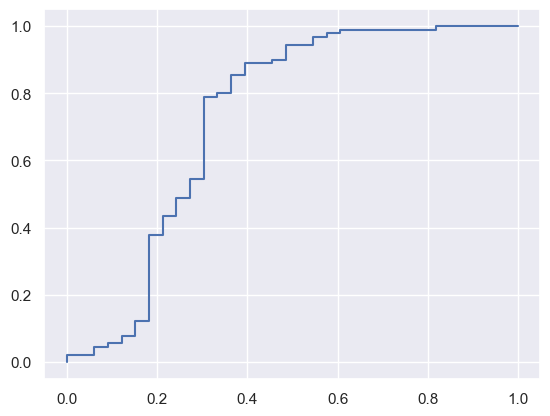

In [66]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

#### Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
NBtree=GaussianNB()
NBtree.fit(X_train, y_train)

GaussianNB()

In [69]:
y_pred_NB = NBtree.predict(X_test)

In [70]:
print(y_pred_NB[:10])
print(y_test.values[:10])

[1 1 1 1 1 0 1 1 0 1]
[1 0 1 0 1 0 1 1 0 1]


In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [72]:
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)

In [73]:
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 83.74
F1 is: 0.9
Precision is: 0.83
Recall is: 0.98


In [74]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [75]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [76]:
confusion_matrix(y_test,y_pred_NB)

array([[15, 18],
       [ 2, 88]], dtype=int64)

In [77]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 15
False postive: 18
False negative: 2
True postive: 88


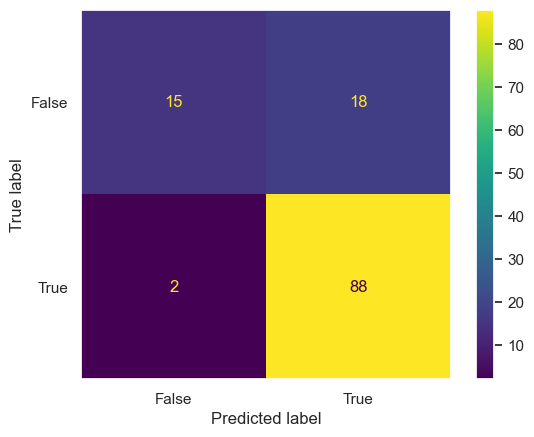

In [78]:
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True]).plot()

plt.grid(False)
plt.show()

In [79]:
NBtree.predict_proba(X_test)[:,1]

array([8.81121226e-01, 9.21254579e-01, 8.92390403e-01, 9.32587637e-01,
       9.50338439e-01, 2.92555131e-09, 9.37138395e-01, 8.77768676e-01,
       6.89988931e-09, 9.39194175e-01, 9.23563275e-01, 9.13374505e-01,
       9.04045557e-01, 9.38700049e-01, 9.72756015e-01, 9.30797450e-01,
       7.78981504e-01, 8.37878504e-01, 8.90691079e-01, 6.02573090e-09,
       1.61552698e-08, 9.37523530e-01, 9.12368506e-01, 9.39577572e-01,
       9.21935684e-01, 9.25288901e-01, 9.00625847e-01, 9.25126956e-01,
       2.45436865e-08, 1.11304669e-08, 9.31253218e-01, 7.80931624e-01,
       8.87425063e-01, 9.19568158e-01, 9.35733679e-01, 7.97954070e-09,
       9.35052829e-01, 7.98468847e-01, 9.32223890e-01, 8.95724611e-01,
       9.17703333e-01, 1.92636674e-08, 9.11955151e-01, 8.67241458e-01,
       9.07303682e-01, 8.91794583e-01, 9.34636419e-01, 9.21066989e-01,
       9.20270371e-01, 8.87280495e-01, 9.23632417e-01, 9.31590401e-01,
       8.48187557e-01, 8.87188732e-01, 9.26459039e-01, 9.17582788e-01,
      

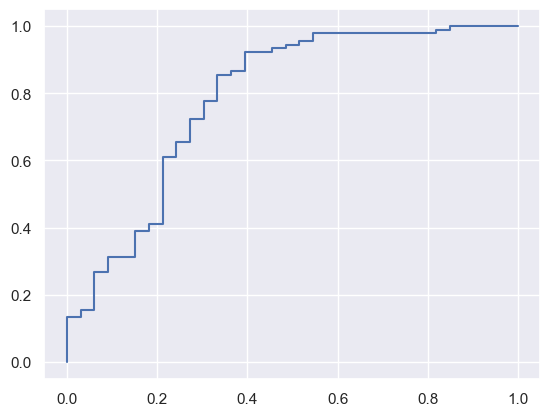

In [80]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

#### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)


KNeighborsClassifier()

In [83]:
y_pred_KNN = KNNtree.predict(X_test)

In [84]:
print(y_pred_KNN[:10])
print(y_test.values[:10])

[1 1 1 1 1 1 0 1 1 0]
[1 0 1 0 1 0 1 1 0 1]


In [85]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [86]:
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)

In [87]:
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 64.23
F1 is: 0.77
Precision is: 0.73
Recall is: 0.81


In [88]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.26      0.18      0.21        33
           1       0.73      0.81      0.77        90

    accuracy                           0.64       123
   macro avg       0.50      0.50      0.49       123
weighted avg       0.60      0.64      0.62       123



In [89]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [90]:
confusion_matrix(y_test,y_pred_KNN)

array([[ 6, 27],
       [17, 73]], dtype=int64)

In [91]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 6
False postive: 27
False negative: 17
True postive: 73


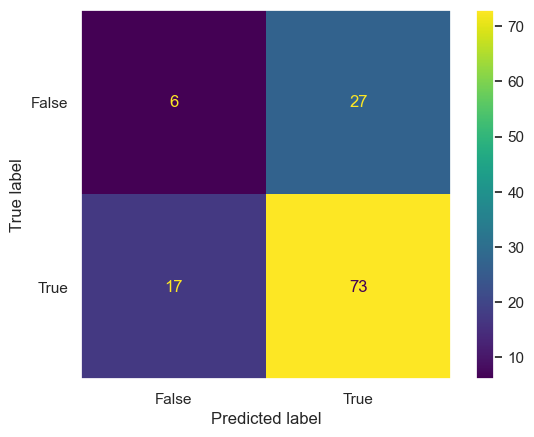

In [92]:
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True]).plot()

plt.grid(False)
plt.show()

In [93]:
KNNtree.predict_proba(X_test)[:,1]

array([0.8, 0.6, 0.6, 0.6, 0.6, 1. , 0.4, 0.6, 1. , 0.4, 0.8, 0.8, 0.6,
       0.8, 0.8, 0.8, 0.4, 0.8, 0.8, 1. , 1. , 1. , 0.6, 0.4, 1. , 0.4,
       0.6, 0.8, 0.6, 0.4, 0.6, 0.4, 1. , 0.8, 0.8, 0.6, 1. , 0.8, 0.4,
       1. , 0.8, 0.8, 0.8, 0.8, 0.8, 0.2, 1. , 0. , 0.8, 0.8, 0.8, 0.4,
       0.4, 0.8, 0.4, 0.6, 0.8, 0.4, 0.6, 0.8, 0.6, 0.8, 1. , 0.6, 1. ,
       0.8, 0.8, 1. , 0.6, 1. , 0.8, 0.6, 0.6, 0.4, 0.6, 0.8, 0.6, 0.4,
       0.8, 0.8, 0.4, 1. , 0.6, 0.8, 1. , 0.6, 0.8, 0.6, 1. , 0.8, 1. ,
       0.8, 0.8, 0.6, 0.8, 0.6, 0.8, 0.8, 0.6, 1. , 0.4, 1. , 0.6, 0.6,
       1. , 0.6, 1. , 0.4, 0.6, 0.6, 0.4, 0.4, 1. , 0.8, 0.8, 1. , 0.6,
       1. , 0.8, 0.2, 0.8, 0.4, 0.8])

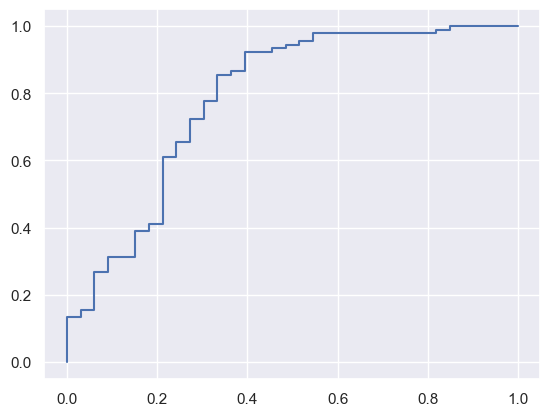

In [94]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

#### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
y_pred_RF=RFtree.predict(X_test)

In [98]:
print(y_pred_RF[:10])
print(y_test.values[:10])

[1 1 1 1 1 0 1 0 0 1]
[1 0 1 0 1 0 1 1 0 1]


In [99]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [100]:
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)

In [101]:
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 79.67
F1 is: 0.87
Precision is: 0.82
Recall is: 0.93


In [102]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.26      0.18      0.21        33
           1       0.73      0.81      0.77        90

    accuracy                           0.64       123
   macro avg       0.50      0.50      0.49       123
weighted avg       0.60      0.64      0.62       123



In [103]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [104]:
confusion_matrix(y_test,y_pred_RF)

array([[14, 19],
       [ 6, 84]], dtype=int64)

In [105]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 14
False postive: 19
False negative: 6
True postive: 84


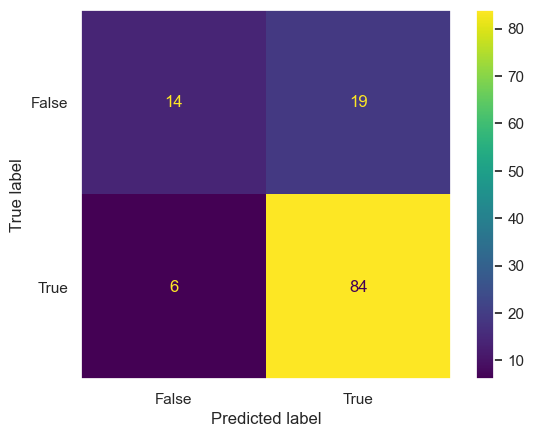

In [106]:
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True]).plot()
plt.grid(False)
plt.show()

In [107]:
RFtree.predict_proba(X_test)[:,1]

array([0.69, 0.96, 0.55, 0.63, 0.97, 0.22, 0.83, 0.46, 0.22, 0.89, 0.83,
       0.92, 0.6 , 0.89, 0.89, 0.92, 0.63, 0.83, 0.67, 0.16, 0.06, 0.97,
       0.76, 0.75, 0.69, 0.66, 0.65, 0.79, 0.12, 0.14, 0.73, 0.54, 0.95,
       0.56, 0.77, 0.27, 0.79, 0.89, 0.79, 0.96, 0.68, 0.16, 0.58, 0.79,
       0.82, 0.51, 0.99, 0.85, 0.81, 0.85, 0.81, 0.77, 0.88, 0.86, 0.55,
       0.35, 0.99, 0.57, 0.81, 0.92, 0.12, 0.72, 0.94, 0.01, 0.76, 0.69,
       0.86, 0.74, 0.75, 0.94, 0.6 , 0.94, 0.47, 0.55, 0.96, 0.91, 0.52,
       0.56, 0.78, 0.02, 0.51, 0.89, 0.81, 0.96, 0.62, 0.71, 0.97, 0.58,
       0.9 , 1.  , 0.98, 0.79, 0.84, 0.33, 0.78, 0.03, 0.78, 0.84, 0.95,
       0.98, 0.41, 0.92, 0.76, 0.78, 0.66, 0.85, 0.76, 0.68, 0.91, 0.68,
       0.82, 0.78, 0.53, 0.91, 0.22, 0.08, 0.81, 0.7 , 0.87, 0.76, 0.69,
       0.13, 0.81])

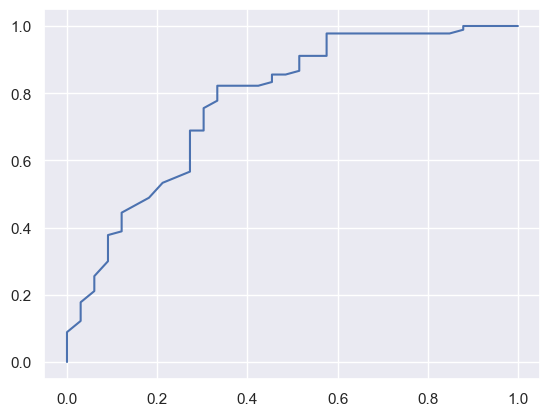

In [108]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

#### Gradient Boosting

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [110]:
y_pred_GB=RFtree.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_GB= round(accuracy_score(y_test,y_pred_GB)*100,2)
f1_GB=round(f1_score(y_test,y_pred_GB),2)
precision_GB=round(precision_score(y_test,y_pred_GB),2)
recall_GB=round(recall_score(y_test,y_pred_GB),2)
print("accuray is:",acc_GB)
print("F1 is:",f1_GB)
print("Precision is:",precision_GB)
print("Recall is:",recall_GB)

accuray is: 79.67
F1 is: 0.87
Precision is: 0.82
Recall is: 0.93


In [112]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [113]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 14
False postive: 19
False negative: 6
True postive: 84


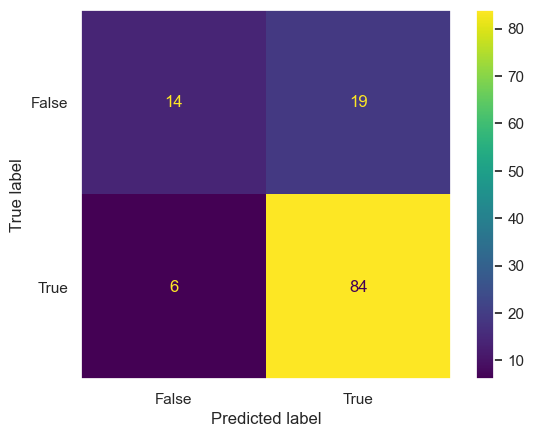

In [114]:
cmt=confusion_matrix(y_test,y_pred_GB)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True]).plot()

plt.grid(False)
plt.show()

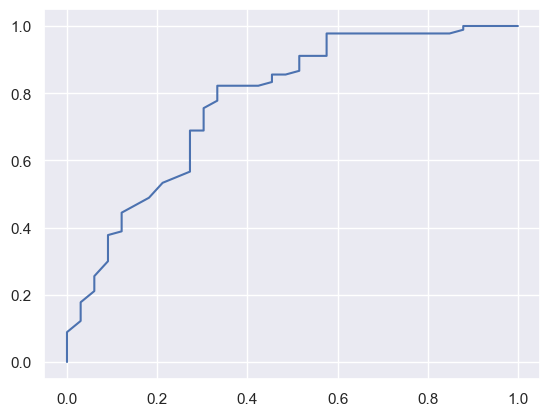

In [115]:
y_GB_pred_prob=GB.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

#### Comparing Which Model is best

In [116]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF,acc_GB],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF,precision_GB],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF,recall_GB],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF,f1_GB]}

pd.DataFrame(dict1,index=['Decision Tree','K Nearest Neighbour','Logistic regression','Naive Bayes','Random Forest','Gradient Boosting'])

,Accuracy,Precision,Recall,F1-score
Decision Tree,71.54,0.84,0.76,0.80
K Nearest Neighbour,64.23,0.73,0.81,0.77
Logistic regression,82.93,0.82,0.98,0.89
Naive Bayes,83.74,0.83,0.98,0.90
Random Forest,79.67,0.82,0.93,0.87
Gradient Boosting,79.67,0.82,0.93,0.87


## Model Developement With Hyperparameter Tunning

#### Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier()

In [118]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()
grid_tree

DecisionTreeClassifier()

In [119]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [120]:
param_grid={
    "criterion":['gini','entropy'],
    "max_depth":[1,2,3,4,5,6],
    "min_samples_split":[1,2,3],
    "min_samples_leaf":[2,3,4,5],
    "random_state":[0,42]
}

In [121]:
import time
start = time.time()
grid_search = GridSearchCV(grid_tree,
                          param_grid,
                          scoring='accuracy',
                          cv=5,
                          verbose=True)
end= time.time()

print("Te total time taken is:",(end-start))

Te total time taken is: 0.0


In [122]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [123]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("The total time taken is :",(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
The total time taken is : 5.03874659538269


In [124]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, random_state=0)

In [125]:
grid_search.best_score_

0.8119682094436653

In [126]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 0}

In [127]:
grid_search.best_index_

2

### Developing Decision Tree with best parameters

In [128]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',
                            max_depth=6,
                            min_samples_leaf=4,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=0)

In [129]:
y_pred_dt=dtree.predict(X_test)

In [130]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

In [131]:
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)


accuray is: 78.05
F1 is: 0.86
Precision is: 0.81
Recall is: 0.92


In [132]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.65      0.39      0.49        33
           1       0.81      0.92      0.86        90

    accuracy                           0.78       123
   macro avg       0.73      0.66      0.68       123
weighted avg       0.76      0.78      0.76       123



In [133]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 13
False postive: 20
False negative: 7
True postive: 83


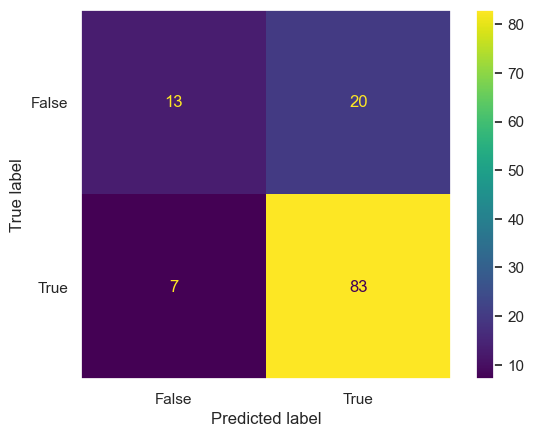

In [134]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

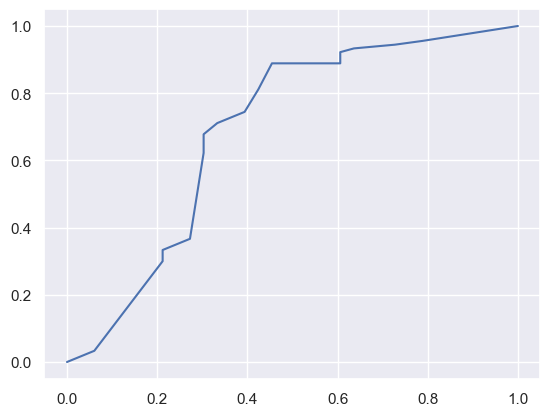

In [135]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [136]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
f1 = imp_df.sort_values(by="Importance", ascending=False)
f1

,Feature Name,Importance
9,Credit_History,0.635225
5,ApplicantIncome,0.117942
7,LoanAmount,0.093502
6,CoapplicantIncome,0.091862
1,Married,0.018781
10,Property_Area,0.018635
3,Education,0.012704
4,Self_Employed,0.011350
0,Gender,0.000000
2,Dependents,0.000000


#### Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF

RandomForestClassifier()

In [138]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()
RF_params=[keys for keys in grid_RF.get_params()]
print("available parameters for model :",RF_params)

available parameters for model : ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']


In [139]:
param_grid = {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'],
    'max_depth': [ 5, 10],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 42]
}

In [140]:
grid_search = GridSearchCV(grid_RF,  
                           param_grid, 
                           scoring='accuracy', 
                           cv=5,
                          verbose=True)

In [141]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("The total time taken is :",(end-start))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
The total time taken is : 38.072964906692505


In [142]:
grid_search.best_params_


{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 0}

In [143]:
grid_search.best_index_

16

In [144]:
grid_search.best_score_

0.8119682094436653

In [145]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=0)

#### Developing Random Forest with best Parameters

In [146]:
from sklearn.ensemble import RandomForestClassifier
RFTree=RandomForestClassifier(criterion='gini',
                              max_depth= 5,
                              max_features='sqrt',
                              n_estimators=100,
                              random_state=0)
RFTree.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [147]:
y_pred_RF=RFtree.predict(X_test)

In [148]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
acc_RF=round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)

In [149]:
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 79.67
F1 is: 0.87
Precision is: 0.82
Recall is: 0.93


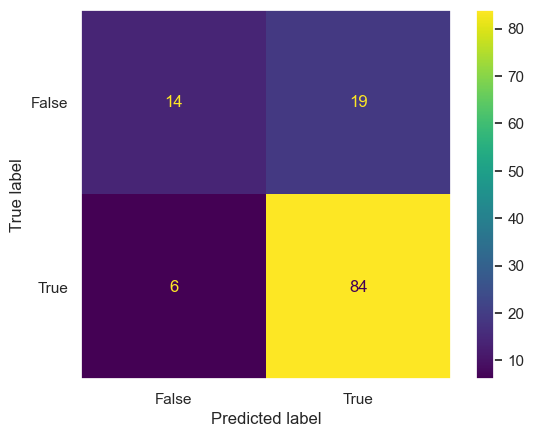

In [150]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [151]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 14
False postive: 19
False negative: 6
True postive: 84


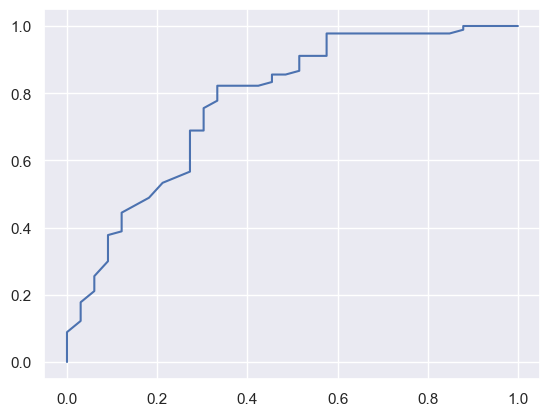

In [152]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [154]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_KNN=KNeighborsClassifier()
KNN_params=[keys for keys in grid_KNN.get_params()]
print("Parameter are:",KNN_params)

Parameter are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']


In [155]:
param_grid={
    'n_neighbors':[6,7,8,12],
    'leaf_size':[30,40,50,70],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [156]:
grid_search = GridSearchCV(grid_KNN,  
                           param_grid, 
                           scoring='accuracy', 
                           cv=5,
                          verbose=True)

In [157]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50, 70],
                         'n_neighbors': [6, 7, 8, 12]},
             scoring='accuracy', verbose=True)

In [158]:
grid_search.best_index_

3

In [159]:
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 12}

In [160]:
grid_search.best_score_

0.6586956521739131

In [161]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=12)

#### Developing Knn Model with best Parameters

In [162]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(algorithm='auto', leaf_size= 30, n_neighbors= 12)
KN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [163]:
y_pred_KN=KN.predict(X_test)

In [164]:
acc_KN= round(accuracy_score(y_test,y_pred_KN)*100,2)
f1_KN=round(f1_score(y_test,y_pred_KN),2)
precision_KN=round(precision_score(y_test,y_pred_KN),2)
recall_KN=round(recall_score(y_test,y_pred_KN),2)

print("accuray is:",acc_KN)
print("F1 is:",f1_KN)
print("Precision is:",precision_KN)
print("Recall is:",recall_KN)


accuray is: 65.85
F1 is: 0.79
Precision is: 0.73
Recall is: 0.86


In [165]:
print(classification_report(y_test,y_pred_KN))

              precision    recall  f1-score   support

           0       0.24      0.12      0.16        33
           1       0.73      0.86      0.79        90

    accuracy                           0.66       123
   macro avg       0.48      0.49      0.47       123
weighted avg       0.59      0.66      0.62       123



In [166]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 4
False postive: 29
False negative: 13
True postive: 77


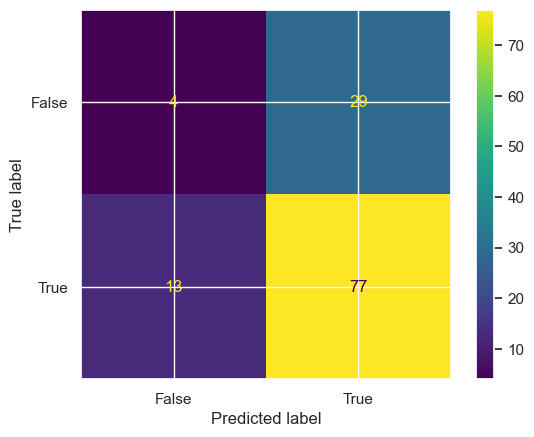

In [167]:
cmt=confusion_matrix(y_test,y_pred_KN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

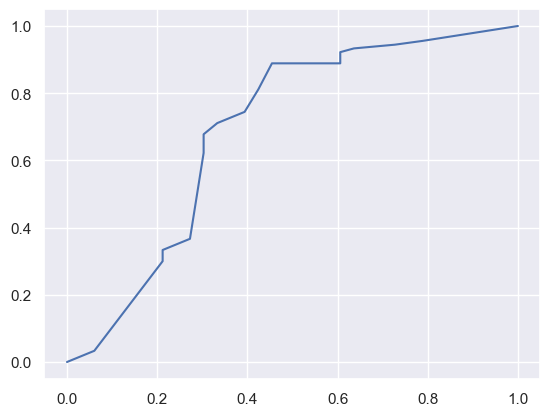

In [168]:
y_KN_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KN_pred_prob) 
plt.plot(fpr,tpr)

#### Naive Bayes

In [169]:
from sklearn.naive_bayes import GaussianNB
GaussianNB()

GaussianNB()

In [170]:
from sklearn.model_selection import GridSearchCV,cross_val_score
NB=GaussianNB()
NB

GaussianNB()

In [171]:
NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [172]:
NB_params=[keys for keys in NB.get_params()]
NB_params

['priors', 'var_smoothing']

In [173]:
param_grid={
    'priors': [None, 'entropy'],
    'var_smoothing':[0.005]
}

In [174]:
grid_search = GridSearchCV(NB,  
                           param_grid, # params 
                           scoring='accuracy',
                           cv=4,
                          verbose=True) # cross validation


In [175]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


GridSearchCV(cv=4, estimator=GaussianNB(),
             param_grid={'priors': [None, 'entropy'], 'var_smoothing': [0.005]},
             scoring='accuracy', verbose=True)

In [176]:
grid_search.best_index_

0

In [177]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 0.005}

In [178]:
grid_search.best_score_

0.660944527736132

In [179]:
grid_search.best_estimator_

GaussianNB(var_smoothing=0.005)

#### Developing Naive Bayes With Best Parameters

In [180]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB(priors=None, var_smoothing= 0.005)
NB.fit(X_train,y_train)

GaussianNB(var_smoothing=0.005)

In [181]:
y_pred_NB=NB.predict(X_test)

In [182]:
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)

print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)


accuray is: 73.98
F1 is: 0.85
Precision is: 0.74
Recall is: 1.0


In [183]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        33
           1       0.74      1.00      0.85        90

    accuracy                           0.74       123
   macro avg       0.87      0.52      0.45       123
weighted avg       0.81      0.74      0.64       123



In [184]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 1
False postive: 32
False negative: 0
True postive: 90


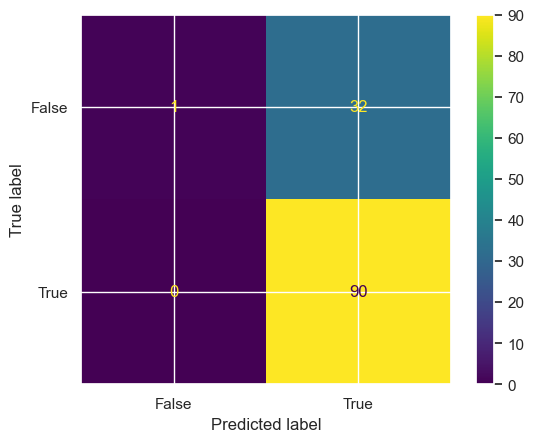

In [185]:
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

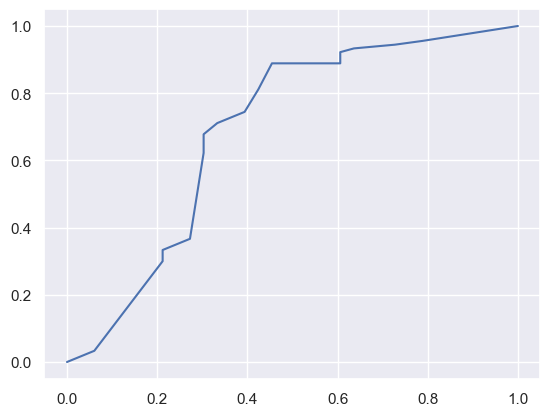

In [186]:
y_NB_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()

In [188]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_log=LogisticRegression()
grid_log

LogisticRegression()

In [189]:
log_params=[keys for keys in grid_log.get_params()]
log_params

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [190]:
grid_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [191]:
log_grid={
    'C':[1.0,'entropy'],
    'intercept_scaling':[4,6,7,8,9,10],
    'fit_intercept':[True],
    'warm_start':[False],
    'max_iter':[0,42]
         
}

In [192]:
grid_search = GridSearchCV(grid_log,  # Base modl
                           log_grid, # params 
                           scoring='accuracy', # metric
                           cv=4,
                          verbose=True)

In [193]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 'entropy'], 'fit_intercept': [True],
                         'intercept_scaling': [4, 6, 7, 8, 9, 10],
                         'max_iter': [0, 42], 'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [194]:
grid_search.best_index_

1

In [195]:
grid_search.best_params_

{'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 42,
 'warm_start': False}

In [196]:
grid_search.best_score_

0.723444527736132

In [197]:
grid_search.best_estimator_

LogisticRegression(intercept_scaling=4, max_iter=42)

In [198]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C= 1.0,
                       fit_intercept= True,
                       intercept_scaling= 4,
                       max_iter=42,
                       warm_start= False)
log.fit(X_train,y_train)

LogisticRegression(intercept_scaling=4, max_iter=42)

In [199]:
y_pred_log=log.predict(X_test)

In [200]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)

In [201]:
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 73.17
F1 is: 0.85
Precision is: 0.73
Recall is: 1.0


In [202]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 0
False postive: 33
False negative: 0
True postive: 90


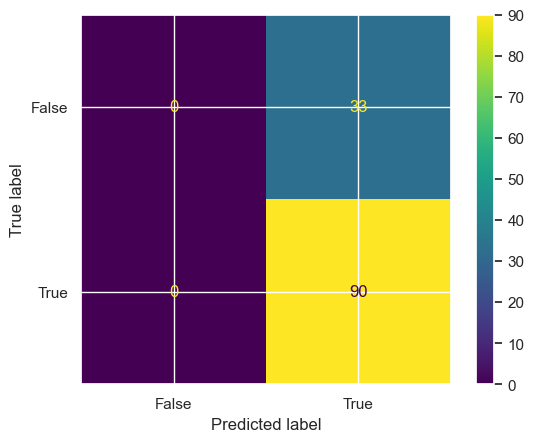

In [203]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()


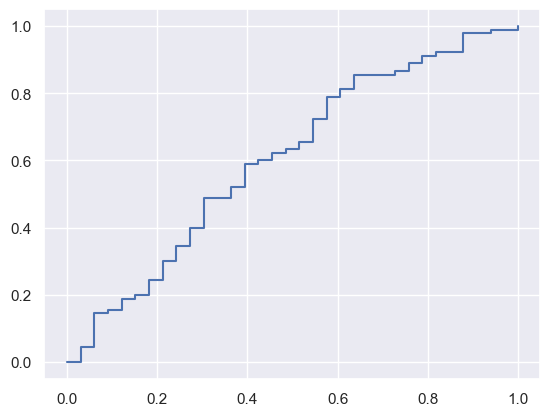

In [204]:
y_log_pred_prob=log.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [205]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
    "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict1,index=['Decision Tree','K nearest Neighbour','Logistic Regression ','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
Decision Tree,78.05,0.81,0.92,0.86
K nearest Neighbour,64.23,0.73,0.81,0.77
Logistic Regression,73.17,0.73,1.00,0.85
Naive Bayes,73.98,0.74,1.00,0.85
Random Forest,79.67,0.82,0.93,0.87


In [206]:
import pickle
pickle.dump(log,open("loan_best_model",'wb'))

In [208]:
y_pred_log

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])